In [1]:
import sys, os
sys.path.append("/Users/yurei/Desktop/My_file/讀書筆記/Machine_Learning/Studying_Club/Neural_Network/deep-learning-from-scratch/")
from dataset.mnist import load_mnist

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from PIL import Image
import pickle
from common.functions import sigmoid , softmax

In [3]:
def img_show(img):
    pil_img=Image.fromarray(np.uint8(img))
    pil_img.show()

## ch4-執行小批次學習

In [4]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

### 訓練資料使誤差降低

In [5]:
(x_train , t_train) , (x_test , t_test) = load_mnist(normalize=True , one_hot_label=True)#one_hot_label會把資料變成[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]的樣子
train_loss_list=[]
#超參數
iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1
network=TwoLayerNet(input_size=784 , hidden_size=50 , output_size=10)
t0=time.time()
for i in range(iters_num):
    #取得小批次
    batch_mask=np.random.choice(train_size , batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    #計算梯度
    #grad=network.numerical_gradient(x_batch , t_batch)
    grad = network.gradient(x_batch , t_batch) #高速版
    #更新參數
    for key in ('W1' , 'b1' , 'W2' , 'b2'):
        network.params[key] -= learning_rate*grad[key]
    #記錄學習過程
    loss=network.loss(x_batch , t_batch)
    train_loss_list.append(loss)
t1=time.time()
print (t1-t0)

12.696485996246338


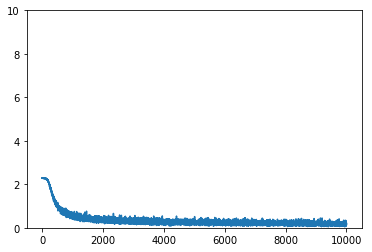

In [6]:
plt.ylim(0,10)
x=np.arange(len(train_loss_list))
y=np.array(train_loss_list)
plt.plot(x , y)
plt.show()

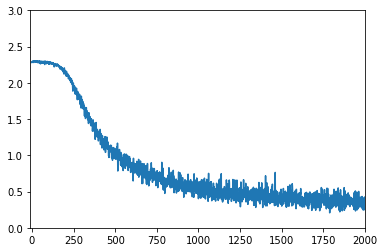

In [7]:
plt.ylim(0,3)
plt.xlim(-10,2000)
x=np.arange(len(train_loss_list))
y=np.array(train_loss_list)
plt.plot(x , y)
plt.show()

### 真的來跑資料了

In [8]:
(x_train , t_train) , (x_test , t_test) = load_mnist(normalize=True , one_hot_label=True)
train_loss_list=[]
train_acc_list=[]
test_acc_list=[]

#超參數
iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1

#每1 epoch的重複次數
iter_per_epoch=max(train_size/batch_size , 1)

network=TwoLayerNet(input_size=784 , hidden_size=50 , output_size=10)

for i in range(iters_num):
    #取得小批次
    batch_mask=np.random.choice(train_size , batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]
    #計算梯度
    grad = network.gradient(x_batch , t_batch)
    #更新參數
    for key in ('W1','b1','W2','b2'):
        network.params[key] -=learning_rate*grad[key]
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    #計算1 epoch的辨識準確度
    if i % iter_per_epoch == 0:
        train_acc=network.accuracy(x_train , t_train)
        test_acc=network.accuracy(x_test , t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print ("train acc , test acc | " + str(train_acc) + " , " + str(test_acc))

train acc , test acc | 0.11541666666666667 , 0.1179
train acc , test acc | 0.7909833333333334 , 0.7965
train acc , test acc | 0.8769333333333333 , 0.8816
train acc , test acc | 0.8982666666666667 , 0.902
train acc , test acc | 0.9081166666666667 , 0.9111
train acc , test acc | 0.91415 , 0.9169
train acc , test acc | 0.9198666666666667 , 0.9219
train acc , test acc | 0.9241833333333334 , 0.9244
train acc , test acc | 0.9278166666666666 , 0.9287
train acc , test acc | 0.931 , 0.9319
train acc , test acc | 0.9337333333333333 , 0.9327
train acc , test acc | 0.9371 , 0.9372
train acc , test acc | 0.9390166666666667 , 0.9385
train acc , test acc | 0.94135 , 0.9422
train acc , test acc | 0.9436166666666667 , 0.9434
train acc , test acc | 0.9458 , 0.9457
train acc , test acc | 0.9464166666666667 , 0.946


### 來拿幾筆資料predict一下

In [9]:
(a_train , b_train), (a_test , b_test) = load_mnist(normalize=False)

In [13]:
print ('第0筆的資料長這樣：' , b_test[100])
print ('第0筆，如果有one_hot_label就會是這樣：' , t_test[100])

第0筆的資料長這樣： 6
第0筆，如果有one_hot_label就會是這樣： [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [25]:
y0=np.argmax(network.predict(x_test[100]))
print ('我們訓練出來的Neural Network預測出來是：' , y0)
print (y0 == b_test[100])

我們訓練出來的Neural Network預測出來是： 6
True


### 看一下他的照片吧～

In [22]:
#因為已經normalize，所以img_show看不出來是誰
img=a_train[20000]
img=img.reshape(28,28)
print (img.shape)
img_show(img)

(28, 28)


In [15]:
print (x_train.shape)

(60000, 784)


In [16]:
print (x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [17]:
print (t_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
